In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading data 
df=pd.read_csv("/kaggle/input/nasa-nearest-earth-objects/neo.csv")

### Exploratory Data Analysis

In [ ]:
df.shape

(90836, 10)

In [ ]:
#checking complete info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
#checking top 5 records
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
#checking last 5 records
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [ ]:
#Checking Empty values
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

As we can clearly see there are no null values in the dataset. So, Data Imputation is not required here.

In [ ]:
#Checking duplicates if any
df.duplicated().sum()

0

In [ ]:
#checking Unique values
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


In [ ]:
print(df["orbiting_body"].value_counts())
print(df["sentry_object"].value_counts())

Earth    90836
Name: orbiting_body, dtype: int64
False    90836
Name: sentry_object, dtype: int64


Based on the above observations, we can conclude that column "hazardous" (True/False) is the output variable. 

And we can clearly see the two columns 'orbiting_body' & 'sentry_object' have only one value (Earth & False). 
So, these two columns are of no use. We can delete these two columns from the dataframe.

In [ ]:
#Dropping two columns 'orbiting_body' & 'sentry_object'
df = df.drop(['id','name','orbiting_body','sentry_object'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [ ]:
#Finding number of hazardous/Non-hazardous objects count
print("Number of hazardous/Non-hazardous objects: \n")
print(df["hazardous"].value_counts())
print("")
print("Percentage of hazardous/Non-hazardous objects: \n")
print((df["hazardous"].value_counts() / len(df))*100)

Number of hazardous/Non-hazardous objects: 

False    81996
True      8840
Name: hazardous, dtype: int64

Percentage of hazardous/Non-hazardous objects: 

False    90.268176
True      9.731824
Name: hazardous, dtype: float64


So, there are 9.7% of hazardous objects found in the dataset.

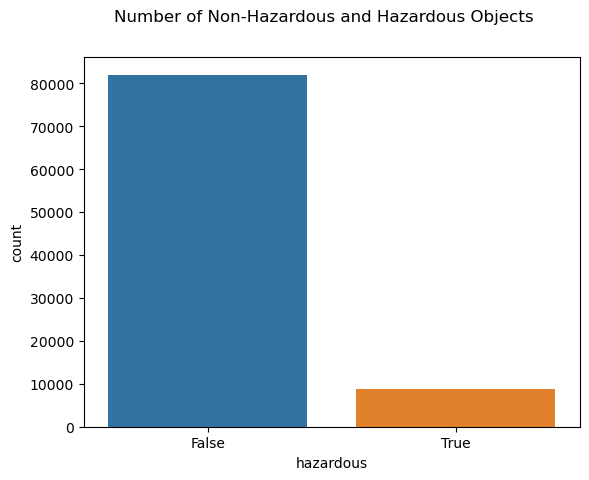

In [ ]:
sns.countplot(x='hazardous',data=df)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

In [ ]:
# Separating Numeric Data 
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


After looking at “Describe” method of input variables, we can see data scaling is required. 

<AxesSubplot:>

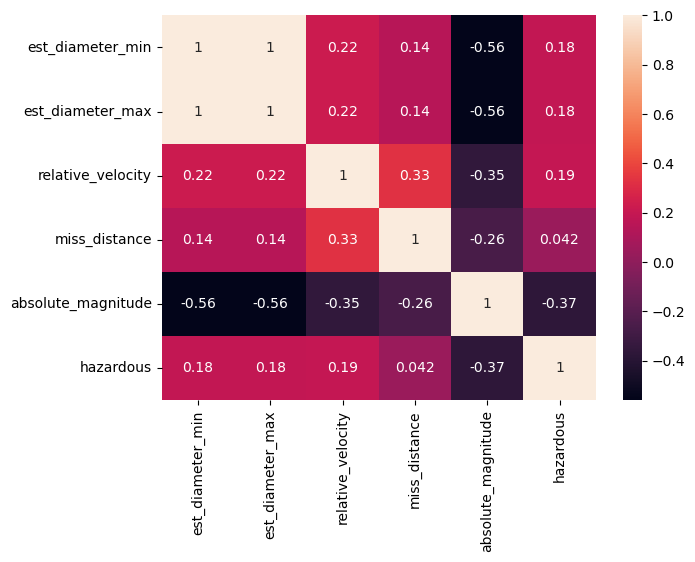

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

After looking at correlation heat map of input variables, we can see that two columns “est_diameter_min” & “est_diameter_max” are strongly correlated each other. 


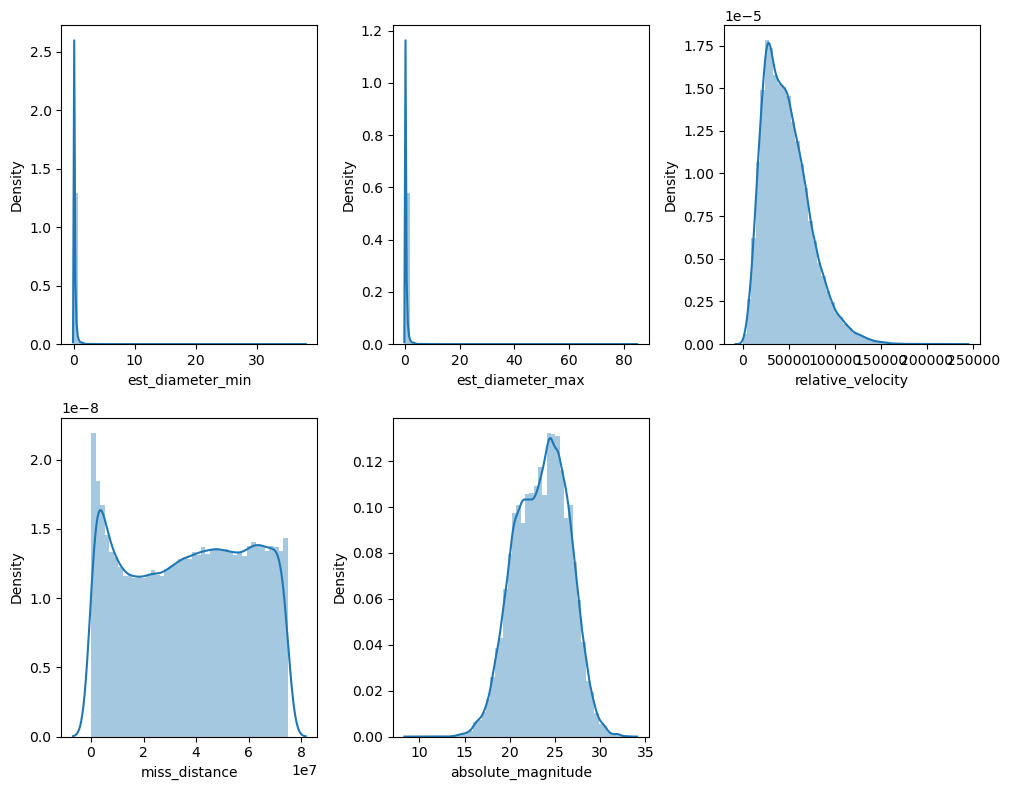

In [ ]:
# Making mulptiple subplots
nums = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
rows=2
cols=3
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

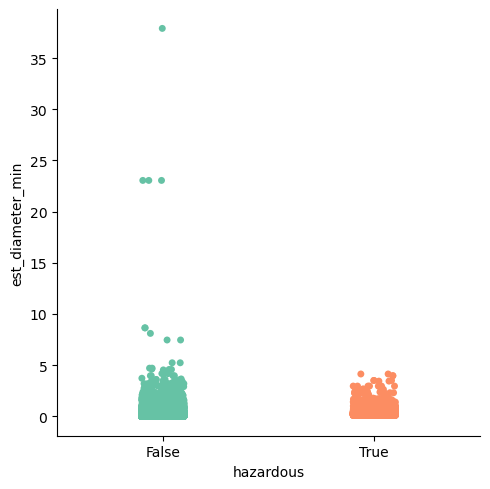

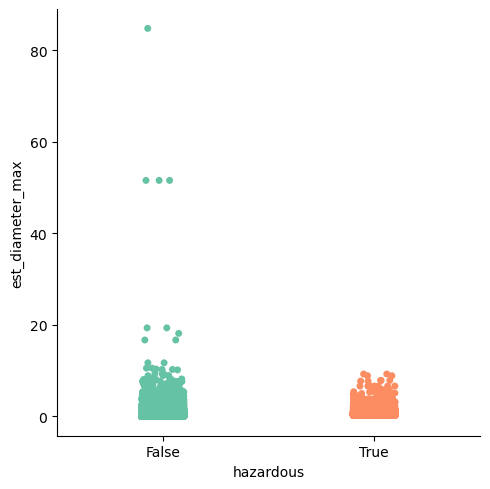

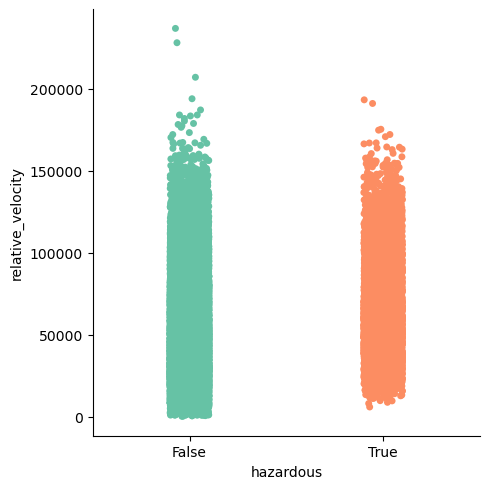

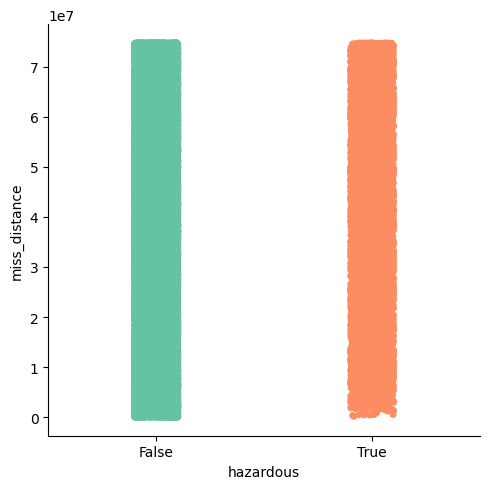

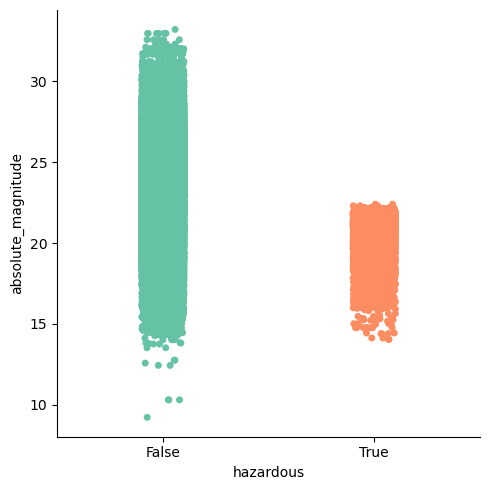

In [ ]:
sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = df)

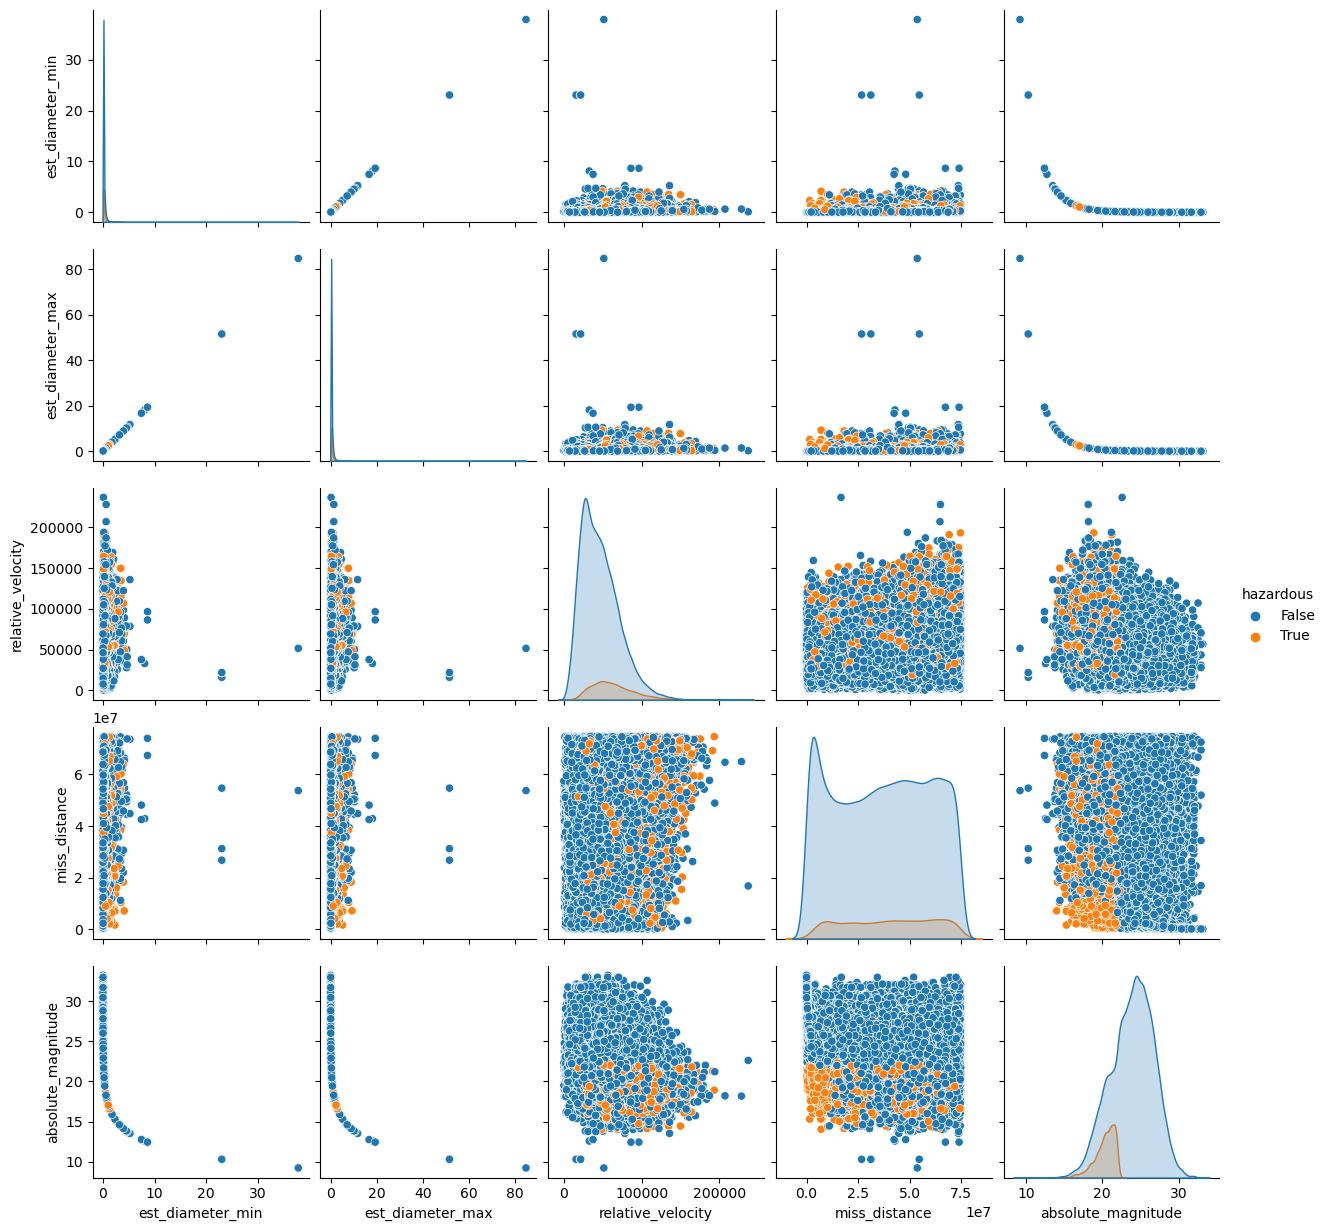

In [ ]:
sns.pairplot(df, hue = "hazardous")

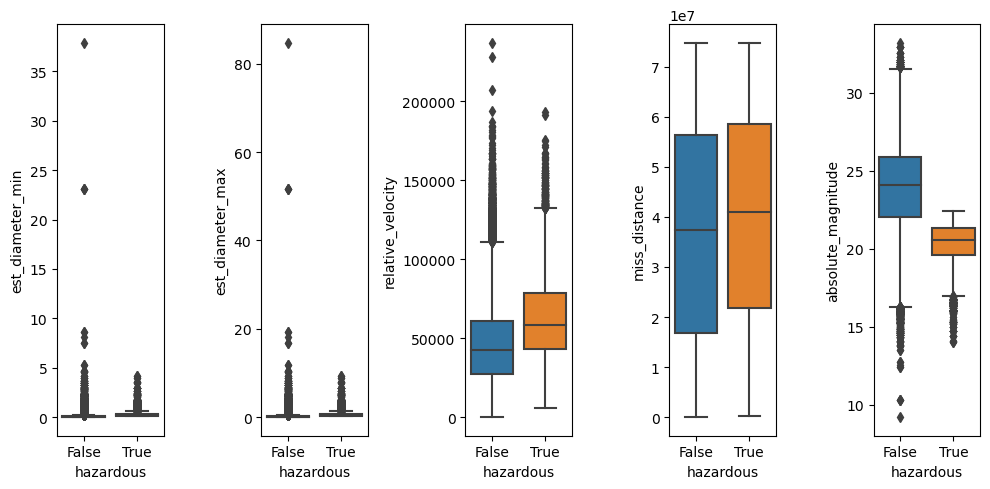

In [ ]:
#Outlier analysis through box plot. Although there are outliers, we will not remove outliers as it is more 
#than 5% of data.

nums=['est_diameter_min','est_diameter_max', 'relative_velocity','miss_distance',
        'absolute_magnitude']#numerical columns
rows=1
cols=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='hazardous',y=i,data=df)
    counter+=1
    
plt.tight_layout()
plt.show()

## Data Pre-Processing

### Label Encoding

In [ ]:
#Label encoding output variable
from sklearn.preprocessing import LabelEncoder

label_encoder_hazardous = LabelEncoder()
df['hazardous'] = label_encoder_hazardous.fit_transform(df['hazardous'])
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


### Feature Engineering

In [ ]:
#Dividing data source to input/output variables for Creating Training & Testing Data set
X = df.drop(['hazardous'],axis=1)
y = df.drop(['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude'],axis=1)
print(X)
print(y)

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              1.198271          2.679415       13569.249224   5.483974e+07   
1              0.265800          0.594347       73588.726663   6.143813e+07   
2              0.722030          1.614507      114258.692129   4.979872e+07   
3              0.096506          0.215794       24764.303138   2.543497e+07   
4              0.255009          0.570217       42737.733765   4.627557e+07   
...                 ...               ...                ...            ...   
90831          0.026580          0.059435       52078.886692   1.230039e+07   
90832          0.016771          0.037501       46114.605073   5.432121e+07   
90833          0.031956          0.071456        7566.807732   2.840077e+07   
90834          0.007321          0.016370       69199.154484   6.869206e+07   
90835          0.039862          0.089133       27024.455553   5.977213e+07   

       absolute_magnitude  
0                   16.

In [ ]:
## over sampling

from imblearn.over_sampling import RandomOverSampler

random_over_sampler = RandomOverSampler()
X, y = random_over_sampler.fit_resample(X, y)
print(X)
print(y)

        est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0               1.198271          2.679415       13569.249224   5.483974e+07   
1               0.265800          0.594347       73588.726663   6.143813e+07   
2               0.722030          1.614507      114258.692129   4.979872e+07   
3               0.096506          0.215794       24764.303138   2.543497e+07   
4               0.255009          0.570217       42737.733765   4.627557e+07   
...                  ...               ...                ...            ...   
163987          0.291444          0.651688      134298.279633   1.147308e+07   
163988          0.231502          0.517654       36643.240794   4.058351e+07   
163989          0.350393          0.783502       61835.714120   1.093730e+07   
163990          0.296862          0.663804       86819.471228   3.603732e+07   
163991          0.169260          0.378477       31084.687486   2.209995e+07   

        absolute_magnitude  
0         

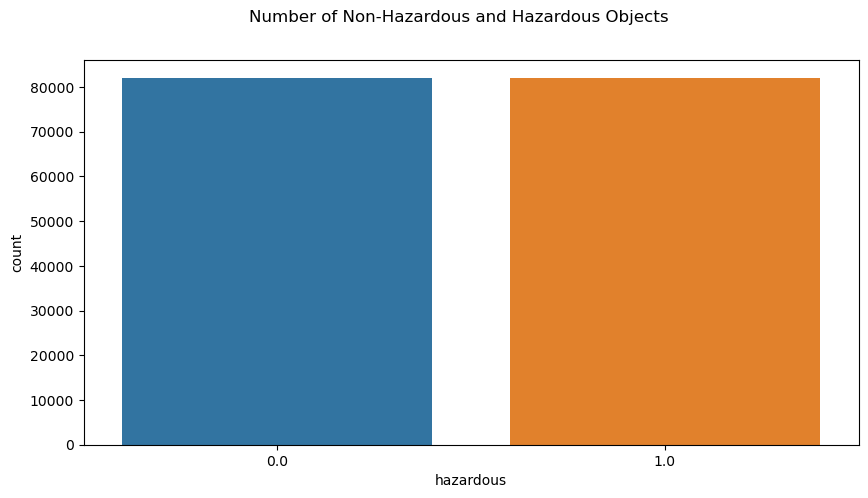

In [ ]:
#After Oversampling Target Variable 
df_new=pd.concat([X,y])
sns.countplot(x='hazardous',data=df_new)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[1,1]
plt.show()

### Train & Test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
#Scaling input variables
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled=pd.DataFrame(sc.transform(X_test))

X_train_scaled.columns=X.columns
print(X_train_scaled)

        est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              -0.314019         -0.314019           2.251791       1.303798   
1               0.203429          0.203429          -0.102841      -1.261233   
2              -0.455381         -0.455381           0.228393       0.868088   
3              -0.213004         -0.213004          -0.519913      -1.253490   
4              -0.064387         -0.064387          -0.888588      -0.244816   
...                  ...               ...                ...            ...   
114789         -0.249820         -0.249820          -0.222599      -1.599774   
114790         -0.026625         -0.026625           0.251622      -0.293939   
114791         -0.053845         -0.053845          -0.531077      -0.296002   
114792         -0.172636         -0.172636           0.154223       0.350065   
114793         -0.378136         -0.378136          -0.185597      -0.015140   

        absolute_magnitude  
0         

In [ ]:
X_train=X_train_scaled
X_test=X_test_scaled

In [ ]:
X_train.shape, y_train.shape

((114794, 5), (114794, 1))

In [ ]:
X_test.shape, y_test.shape

((49198, 5), (49198, 1))

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

def roc_curve_plot(y_test, y_scores, method):
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of ' + method)
    plt.rcParams['figure.figsize']=[6,5]
    plt.show()
    return roc_auc

## Model Building

In [ ]:
#importing all the required packages
#pip install yellowbrick

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import tree

### 1. Logistic Regression

In [ ]:
LR = LogisticRegression(random_state = 1)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# Create metrics table
pr_LR, rec_LR, F_LR,supp = score(y_test, LR_pred)
pr_LR_0, rec_LR_0, F_LR_0 = round(pr_LR[0]*100, 2), round(rec_LR[0]*100,2), round(F_LR[0]*100,2)
pr_LR_1, rec_LR_1, F_LR_1 = round(pr_LR[1]*100, 2), round(rec_LR[1]*100,2), round(F_LR[1]*100,2)

Logistic Regression Accuracy Score:  85.06 %

Logistic Regression - Confusion Matrix


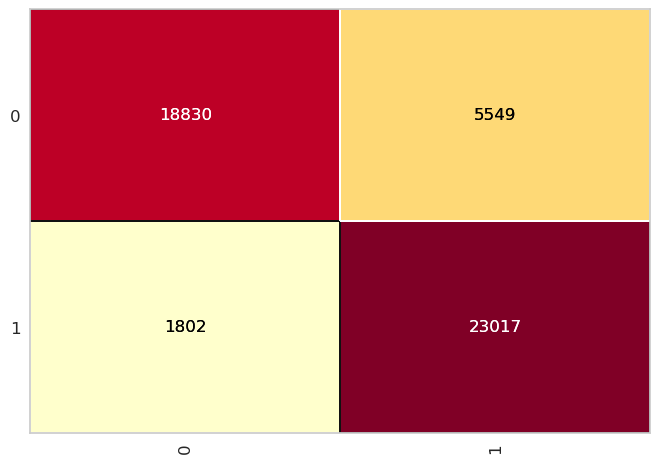

In [ ]:
cm_LR = ConfusionMatrix(LR)
cm_LR.fit(X_train, y_train)
cm_LR.score(X_test, y_test)

Acc_LR = round(cm_LR.score(X_test, y_test)* 100, 2)
print("Logistic Regression Accuracy Score: ",Acc_LR,"%\n")
print("Logistic Regression - Confusion Matrix")

In [ ]:
LR_Report = classification_report(y_test, LR_pred)
print(LR_Report)

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     24379
           1       0.81      0.93      0.86     24819

    accuracy                           0.85     49198
   macro avg       0.86      0.85      0.85     49198
weighted avg       0.86      0.85      0.85     49198



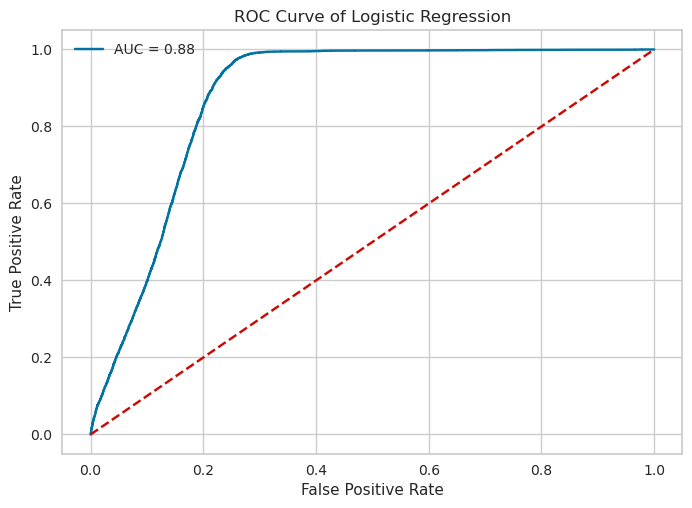

In [ ]:
# Plot ROC curve
y_scores_LR = LR.predict_proba(X_test)
auc_LR = round(roc_curve_plot(y_test, y_scores_LR, 'Logistic Regression')*100,2)

### 2. Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy Score:  83.66 %

Gaussian Naive Bayes - Confusion Matrix


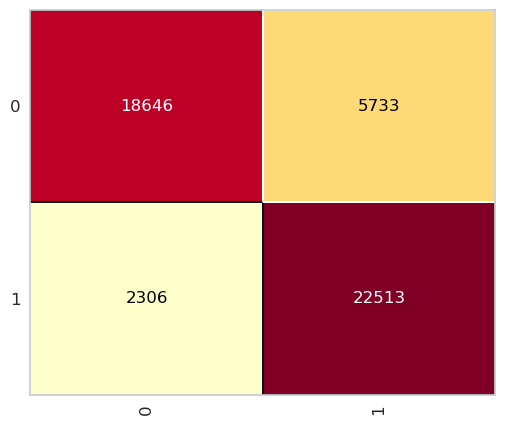

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)

cm_GNB = ConfusionMatrix(GNB)
cm_GNB.fit(X_train, y_train)
Acc_GNB=round(cm_GNB.score(X_test, y_test)* 100, 2)

print("Gaussian Naive Bayes Accuracy Score: ",Acc_GNB,"%\n")
print("Gaussian Naive Bayes - Confusion Matrix")

In [ ]:
# Create metrics table
pr_GNB, rec_GNB, F_GNB,supp = score(y_test, GNB_pred)
pr_GNB_0, rec_GNB_0, F_GNB_0 = round(pr_GNB[0]*100, 2), round(rec_GNB[0]*100,2), round(F_GNB[0]*100,2)
pr_GNB_1, rec_GNB_1, F_GNB_1 = round(pr_GNB[1]*100, 2), round(rec_GNB[1]*100,2), round(F_GNB[1]*100,2)

In [ ]:
GNB_Report = classification_report(y_test, GNB_pred)
print(GNB_Report)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     24379
           1       0.80      0.91      0.85     24819

    accuracy                           0.84     49198
   macro avg       0.84      0.84      0.84     49198
weighted avg       0.84      0.84      0.84     49198



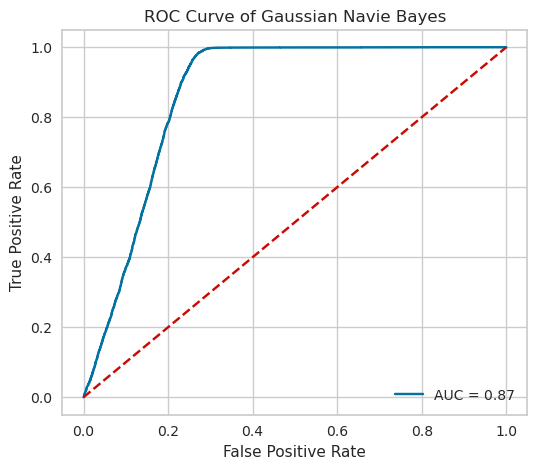

In [ ]:
# Plot ROC curve
y_scores_GNB = GNB.predict_proba(X_test)
auc_GNB = round(roc_curve_plot(y_test, y_scores_GNB, 'Gaussian Navie Bayes')*100,2)

### 3. Decision Tree Classifier

### 3.1 Entropy Method

In [ ]:
DT_ENT = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, random_state=0)
DT_ENT.fit(X_train, y_train)
DT_ENT_Pred = DT_ENT.predict(X_test)

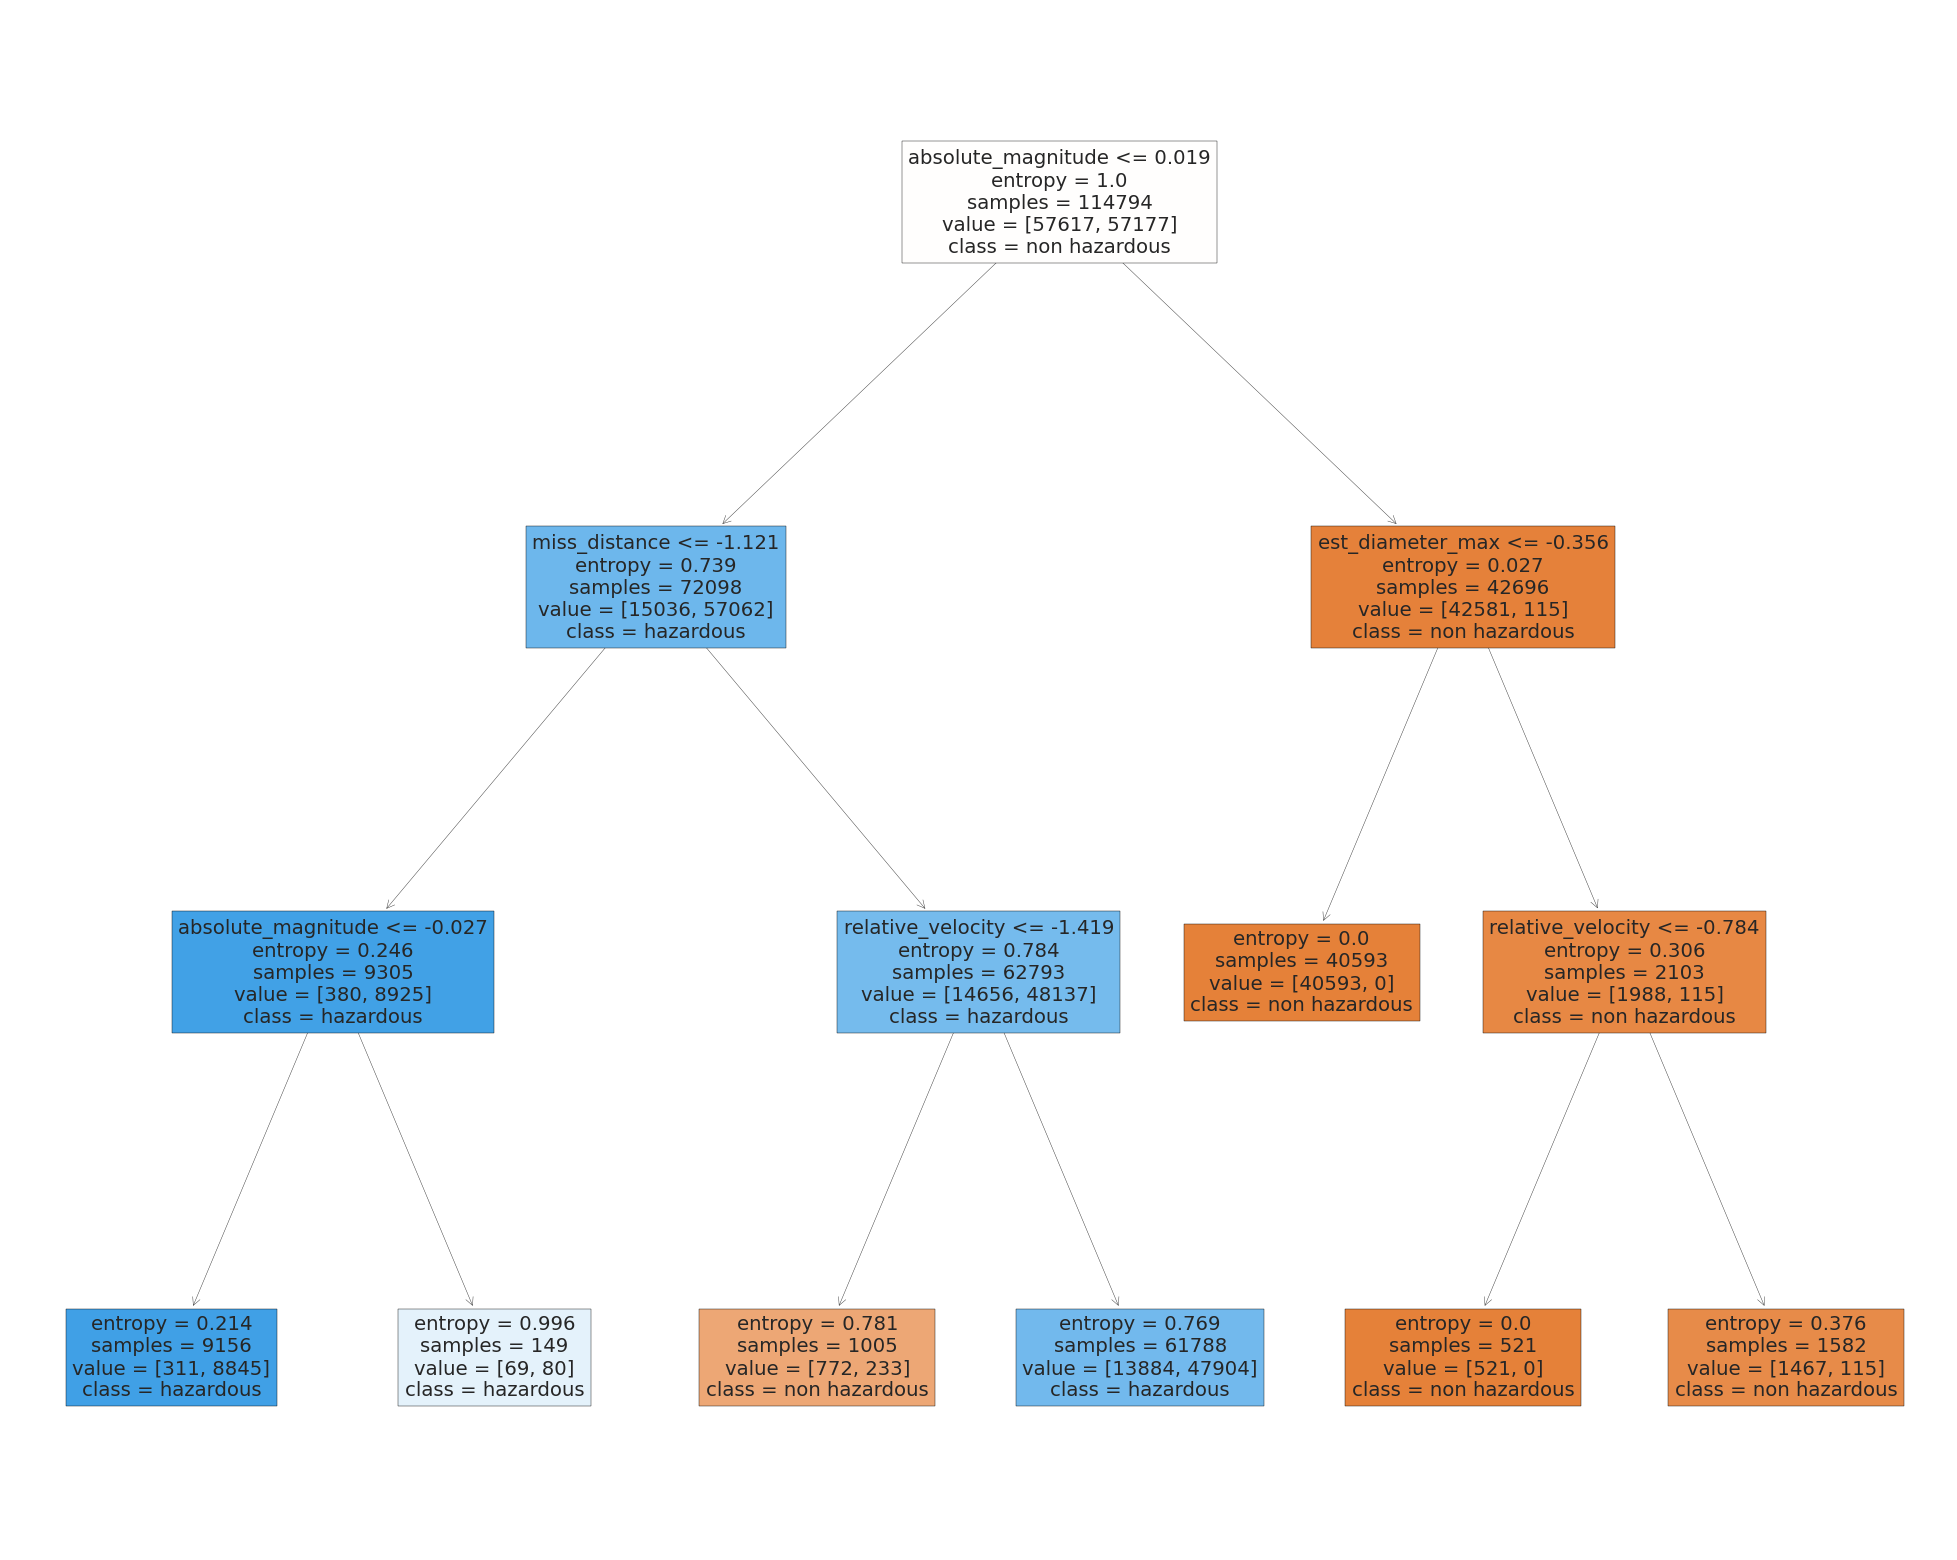

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DT_ENT, feature_names=df.columns[:-1], class_names=['non hazardous', 'hazardous'], filled=True);

Decision Tree (Entropy) Accuracy Score:  87.44 %

Decision Tree (Entropy) - Confusion Matrix


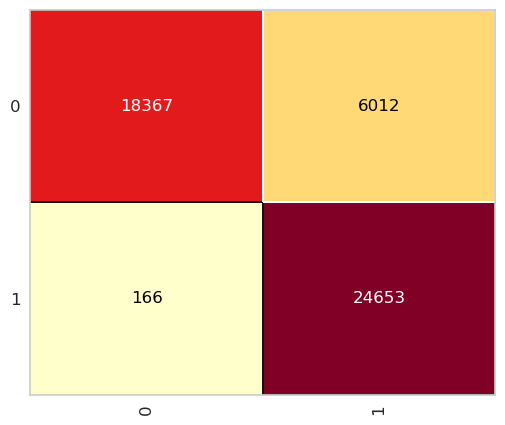

In [ ]:
cm_DT_ENT = ConfusionMatrix(DT_ENT)
cm_DT_ENT.fit(X_train, y_train)
Acc_DT_ENT=round(cm_DT_ENT.score(X_test, y_test)* 100, 2)

print("Decision Tree (Entropy) Accuracy Score: ",Acc_DT_ENT,"%\n")
print("Decision Tree (Entropy) - Confusion Matrix")

In [ ]:
# Create metrics table
pr_DT_ENT, rec_DT_ENT, F_DT_ENT,supp = score(y_test, DT_ENT_Pred)
pr_DT_ENT_0, rec_DT_ENT_0, F_DT_ENT_0 = round(pr_DT_ENT[0]*100, 2), round(rec_DT_ENT[0]*100,2), round(F_DT_ENT[0]*100,2)
pr_DT_ENT_1, rec_DT_ENT_1, F_DT_ENT_1 = round(pr_DT_ENT[1]*100, 2), round(rec_DT_ENT[1]*100,2), round(F_DT_ENT[1]*100,2)

In [ ]:
DT_ENT_Report = classification_report(y_test, DT_ENT_Pred)
print(DT_ENT_Report)

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     24379
           1       0.80      0.99      0.89     24819

    accuracy                           0.87     49198
   macro avg       0.90      0.87      0.87     49198
weighted avg       0.90      0.87      0.87     49198



<AxesSubplot:title={'center':'Feature Importance for Decision tree (Entropy)'}>

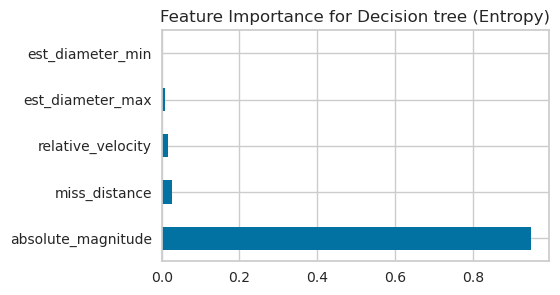

In [ ]:
feature_imp_DT_ENT = pd.Series(DT_ENT.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_DT_ENT.plot(kind='barh', title = 'Feature Importance for Decision tree (Entropy)', figsize=[5,3])

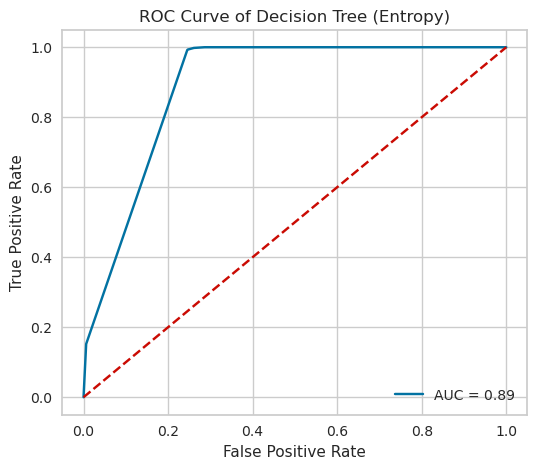

In [ ]:
# Plot ROC curve
y_scores_DT_ENT = DT_ENT.predict_proba(X_test)
auc_DT_ENT = round(roc_curve_plot(y_test, y_scores_DT_ENT, 'Decision Tree (Entropy)')*100,2)

### 3.2 Decision Tree - Gini Impurity Method

In [ ]:
DT_Gini = DecisionTreeClassifier(criterion = 'gini',max_depth= 3, random_state=0)
DT_Gini.fit(X_train, y_train)
DT_Gini_Pred = DT_Gini.predict(X_test)

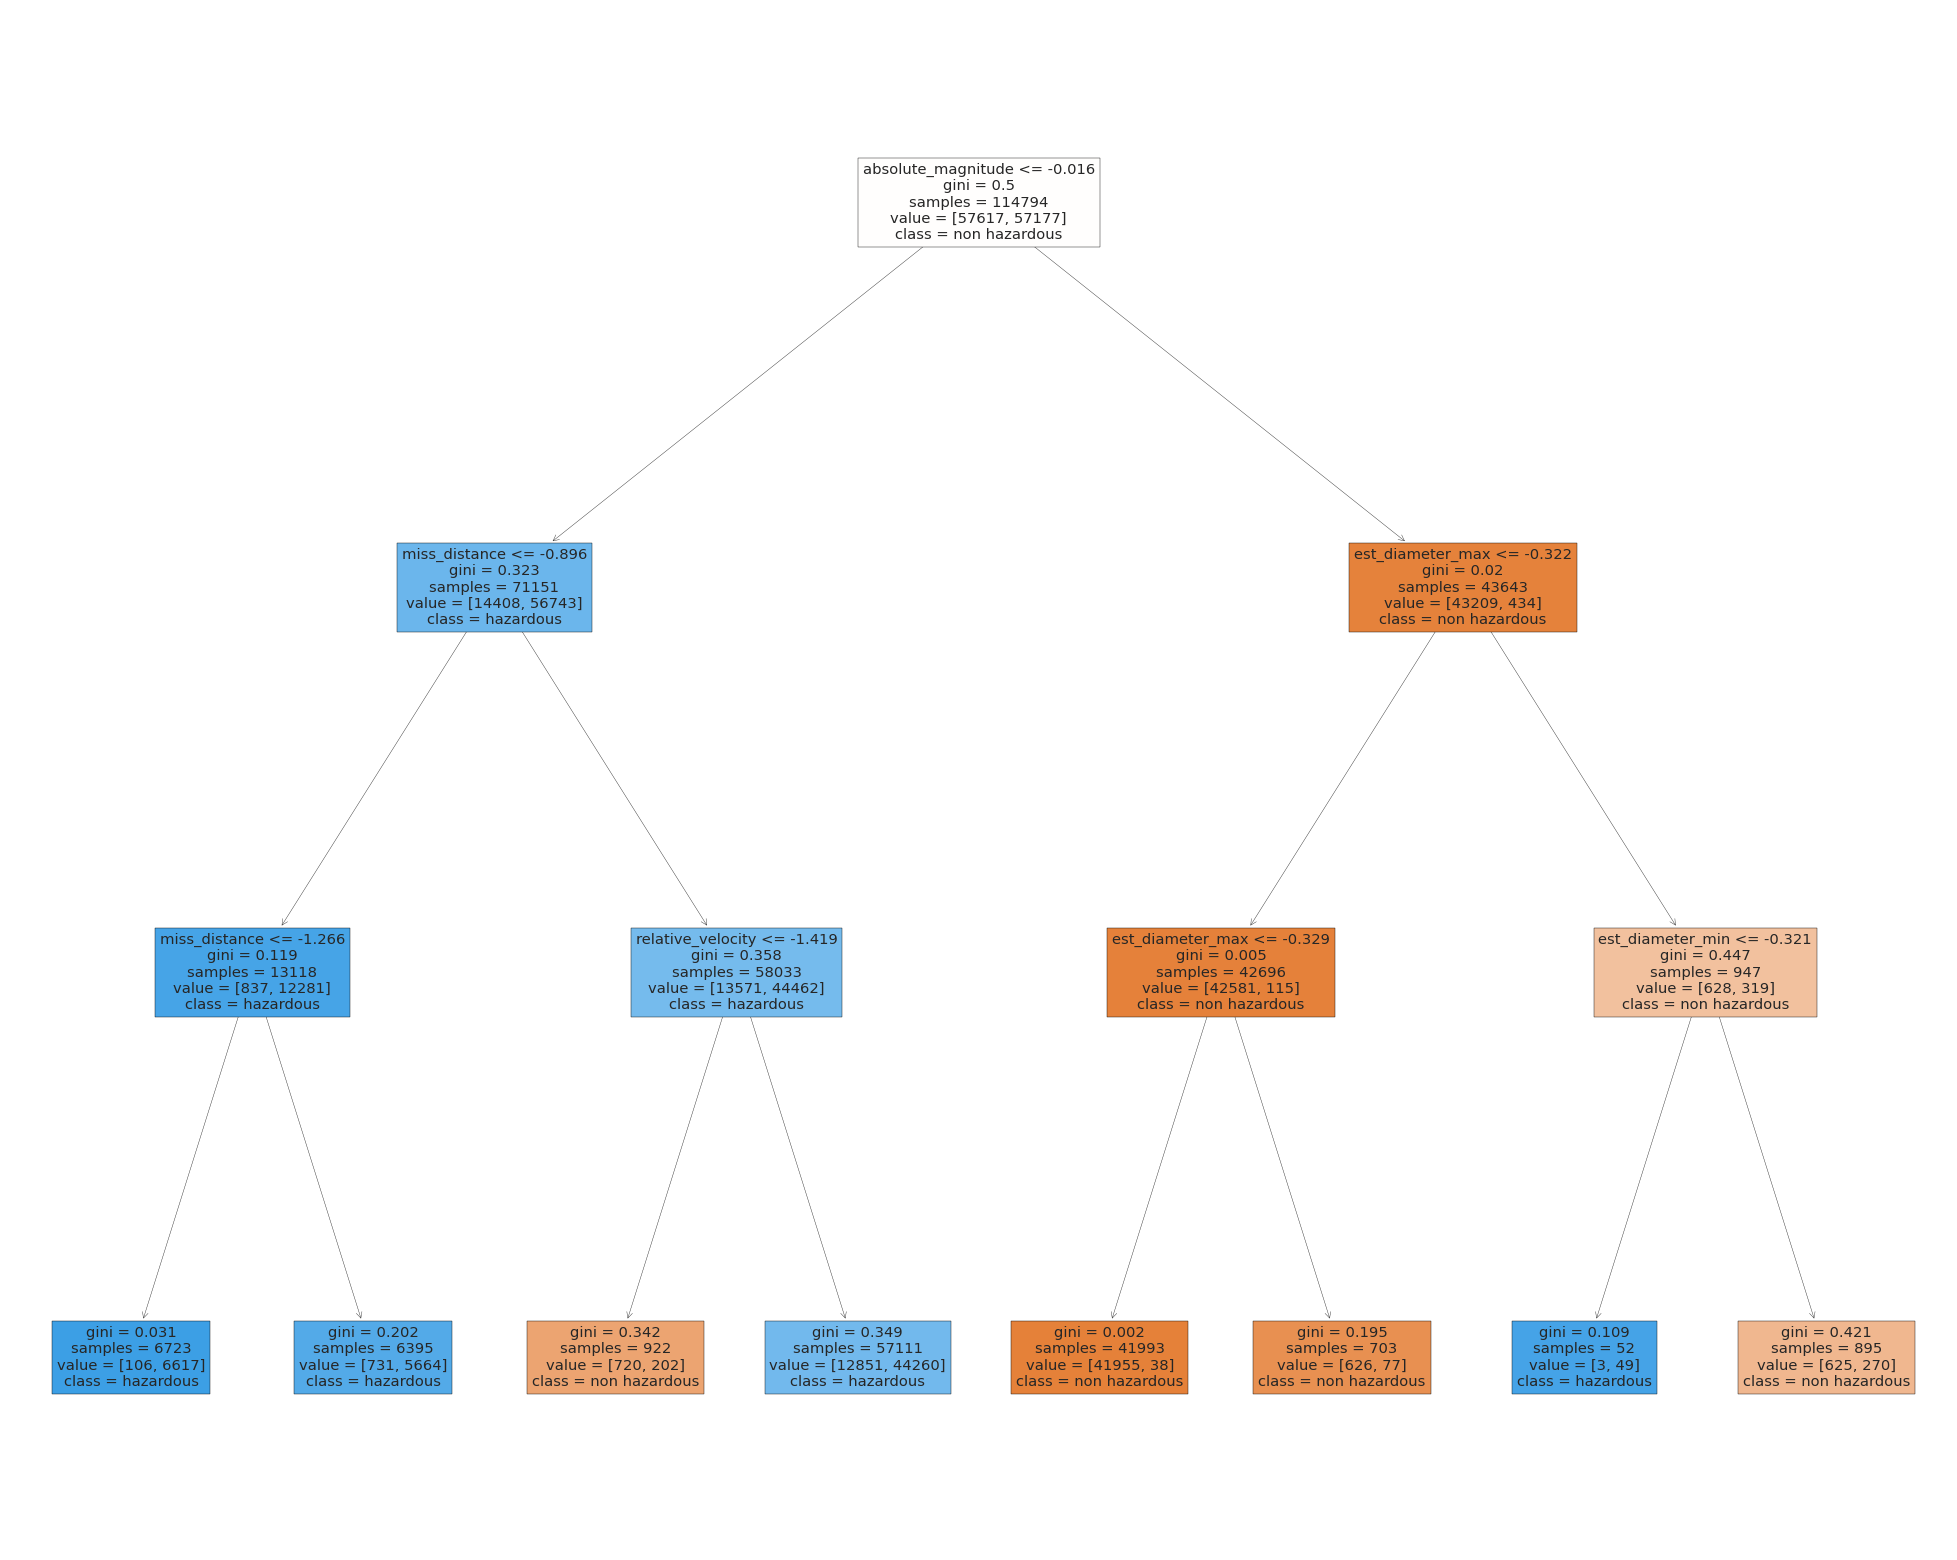

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DT_Gini, feature_names=df.columns[:-1], class_names=['non hazardous', 'hazardous'], filled=True);

Decision Tree (Gini) Accuracy Score:  87.78 %

Decision Tree (Gini) - Confusion Matrix


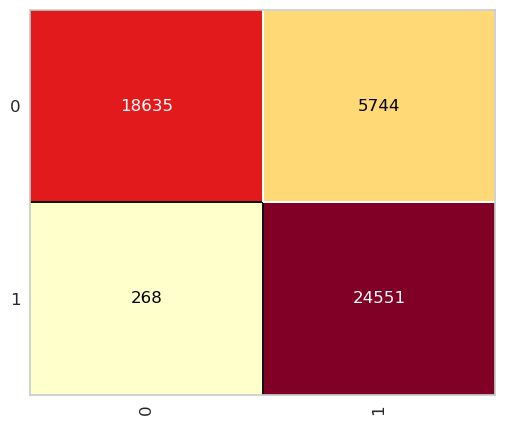

In [ ]:
cm_DT_Gini = ConfusionMatrix(DT_Gini)
cm_DT_Gini.fit(X_train, y_train)
Acc_DT_Gini= round(cm_DT_Gini.score(X_test, y_test)*100,2)

print("Decision Tree (Gini) Accuracy Score: ",Acc_DT_Gini,"%\n")
print("Decision Tree (Gini) - Confusion Matrix")

In [ ]:
# Create metrics table
pr_DT_Gini, rec_DT_Gini, F_DT_Gini,supp = score(y_test, DT_Gini_Pred)
pr_DT_Gini_0, rec_DT_Gini_0, F_DT_Gini_0 = round(pr_DT_Gini[0]*100, 2), round(rec_DT_Gini[0]*100,2), round(F_DT_Gini[0]*100,2)
pr_DT_Gini_1, rec_DT_Gini_1, F_DT_Gini_1 = round(pr_DT_Gini[1]*100, 2), round(rec_DT_Gini[1]*100,2), round(F_DT_Gini[1]*100,2)

In [ ]:
DT_Gini_Report = classification_report(y_test, DT_Gini_Pred)
print(DT_Gini_Report)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     24379
           1       0.81      0.99      0.89     24819

    accuracy                           0.88     49198
   macro avg       0.90      0.88      0.88     49198
weighted avg       0.90      0.88      0.88     49198



<AxesSubplot:title={'center':'Feature Importance for Decision tree (Gini)'}>

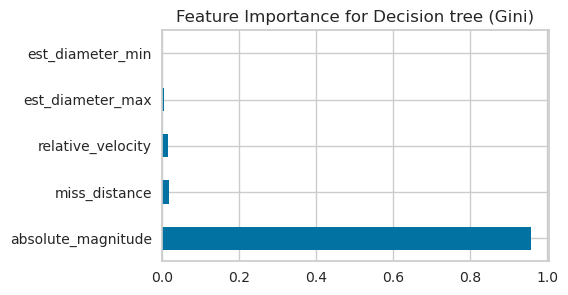

In [ ]:
feature_imp_DT_Gini = pd.Series(DT_Gini.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_DT_Gini.plot(kind='barh', title = 'Feature Importance for Decision tree (Gini)', figsize=[5,3])

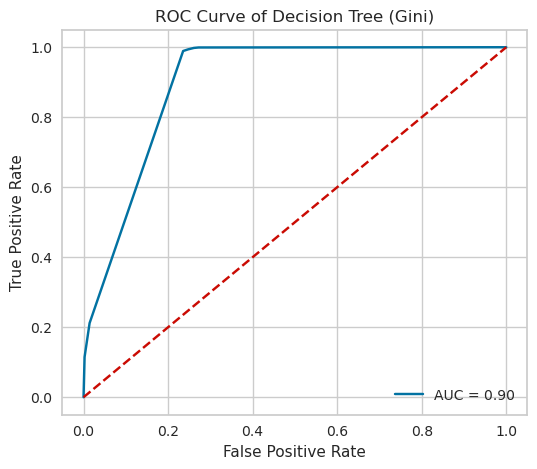

In [ ]:
# Plot ROC curve
y_scores_DT_Gini = DT_Gini.predict_proba(X_test)
auc_DT_Gini = round(roc_curve_plot(y_test, y_scores_DT_Gini, 'Decision Tree (Gini)')*100,2)

### 4. Random Forest

### 4.1 Entropy

In [ ]:
RF_ENT = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
RF_ENT.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
RF_ENT_Pred = RF_ENT.predict(X_test)

Random Forest (Entropy) Accuracy Score:  87.75 %

Random Forest (Entropy) - Confusion Matrix


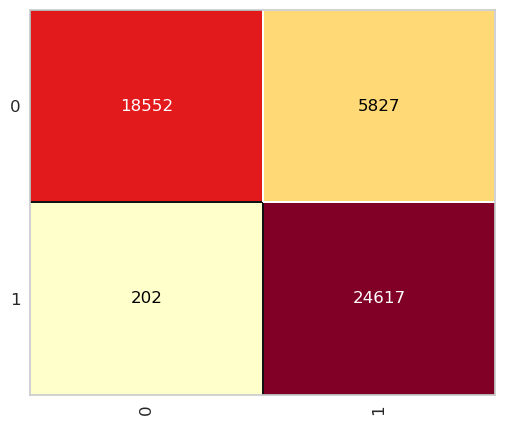

In [ ]:
cm_RF_ENT = ConfusionMatrix(RF_ENT)
cm_RF_ENT.fit(X_train, y_train)
Acc_RF_ENT=round(cm_RF_ENT.score(X_test, y_test)*100,2)

print("Random Forest (Entropy) Accuracy Score: ",Acc_RF_ENT,"%\n")
print("Random Forest (Entropy) - Confusion Matrix")

In [ ]:
# Create metrics table
pr_RF_ENT, rec_RF_ENT, F_RF_ENT,supp = score(y_test, RF_ENT_Pred)
pr_RF_ENT_0, rec_RF_ENT_0, F_RF_ENT_0 = round(pr_RF_ENT[0]*100, 2), round(rec_RF_ENT[0]*100,2), round(F_RF_ENT[0]*100,2)
pr_RF_ENT_1, rec_RF_ENT_1, F_RF_ENT_1 = round(pr_RF_ENT[1]*100, 2), round(rec_RF_ENT[1]*100,2), round(F_RF_ENT[1]*100,2)

In [ ]:
RF_ENT_Report = classification_report(y_test, RF_ENT_Pred)
print(RF_ENT_Report)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     24379
           1       0.81      0.99      0.89     24819

    accuracy                           0.88     49198
   macro avg       0.90      0.88      0.88     49198
weighted avg       0.90      0.88      0.88     49198



<AxesSubplot:title={'center':'Feature Importance for Random Forest (Entropy)'}>

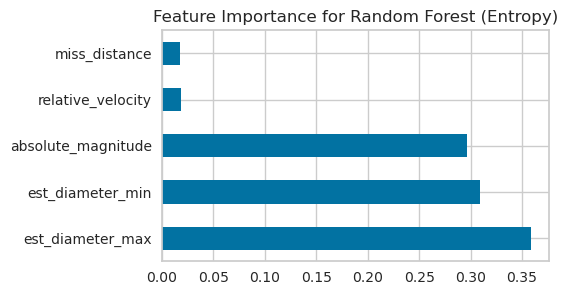

In [ ]:
feature_imp_RF_ENT = pd.Series(RF_ENT.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_RF_ENT.plot(kind='barh', title = 'Feature Importance for Random Forest (Entropy)', figsize=[5,3])

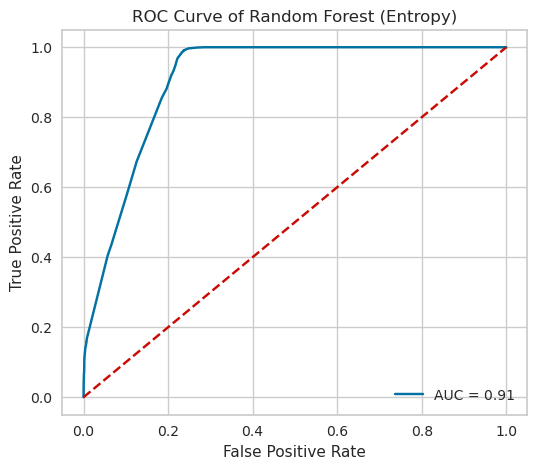

In [ ]:
# Plot ROC curve
y_scores_RF_ENT = RF_ENT.predict_proba(X_test)
auc_RF_ENT = round(roc_curve_plot(y_test, y_scores_RF_ENT, 'Random Forest (Entropy)')*100,2)

### 4.2 Gini Impurity 

In [ ]:
RF_Gini = RandomForestClassifier(n_estimators = 100, max_depth= 3,criterion = 'gini', random_state = 0)
RF_Gini.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
RF_Gini_Pred = RF_Gini.predict(X_test)

Random Forest (Gini) Accuracy Score:  87.42 %

Random Forest (Gini) - Confusion Matrix


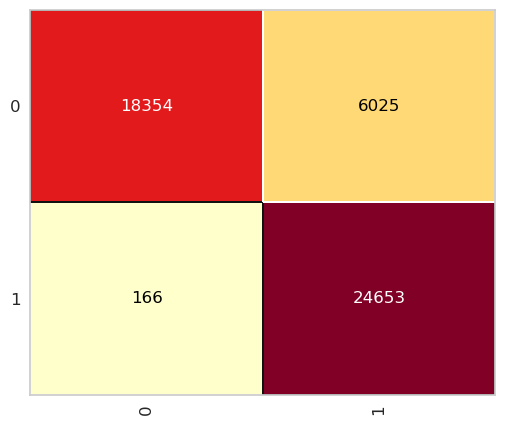

In [ ]:
cm_RF_Gini = ConfusionMatrix(RF_Gini)
cm_RF_Gini.fit(X_train, y_train)
Acc_RF_Gini=round(cm_RF_Gini.score(X_test, y_test)*100,2)

print("Random Forest (Gini) Accuracy Score: ",Acc_RF_Gini,"%\n")
print("Random Forest (Gini) - Confusion Matrix")

In [ ]:
# Create metrics table
pr_RF_Gini, rec_RF_Gini, F_RF_Gini,supp = score(y_test, RF_Gini_Pred)
pr_RF_Gini_0, rec_RF_Gini_0, F_RF_Gini_0 = round(pr_RF_Gini[0]*100, 2), round(rec_RF_Gini[0]*100,2), round(F_RF_Gini[0]*100,2)
pr_RF_Gini_1, rec_RF_Gini_1, F_RF_Gini_1 = round(pr_RF_Gini[1]*100, 2), round(rec_RF_Gini[1]*100,2), round(F_RF_Gini[1]*100,2)

In [ ]:
RF_Gini_Report = classification_report(y_test, RF_Gini_Pred)
print(RF_Gini_Report)

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     24379
           1       0.80      0.99      0.89     24819

    accuracy                           0.87     49198
   macro avg       0.90      0.87      0.87     49198
weighted avg       0.90      0.87      0.87     49198



<AxesSubplot:title={'center':'Feature Importance for Random Forest (Gini)'}>

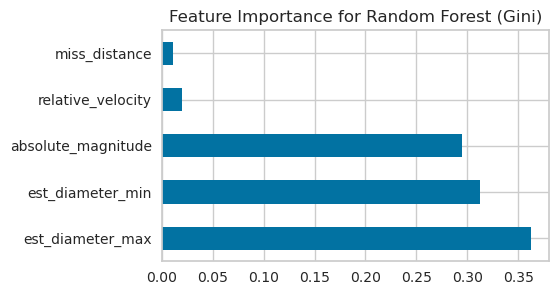

In [ ]:
feature_imp_RF_Gini = pd.Series(RF_Gini.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_RF_Gini.plot(kind='barh', title = 'Feature Importance for Random Forest (Gini)', figsize=[5,3])

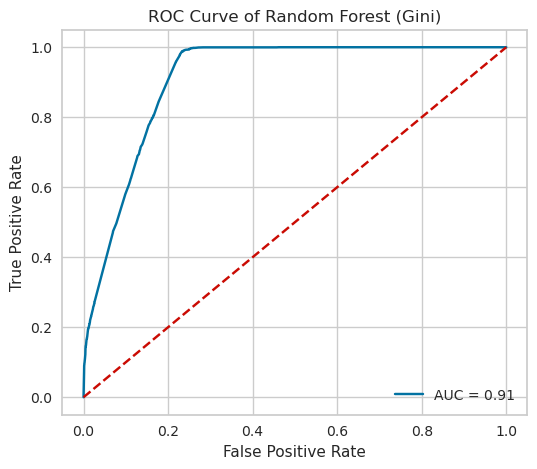

In [ ]:
# Plot ROC curve
y_scores_RF_Gini = RF_Gini.predict_proba(X_test)
auc_RF_Gini = round(roc_curve_plot(y_test, y_scores_RF_Gini, 'Random Forest (Gini)')*100,2)

### 5. K Nearest Neighbor (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
knn.fit(X_train, y_train)
knn_Pred = knn.predict(X_test)

KNN (minkowski) Accuracy Score:  96.12 %

KNN (minkowski) - Confusion Matrix


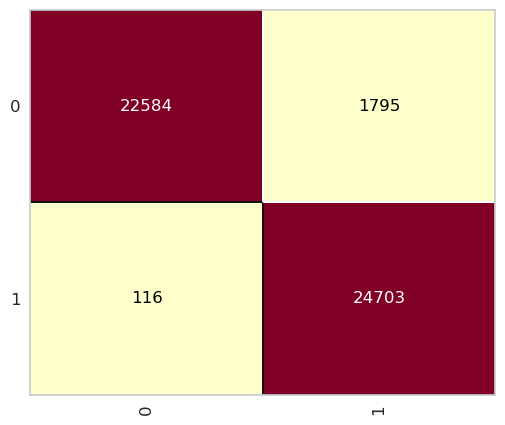

In [ ]:
cm_knn = ConfusionMatrix(knn)
cm_knn.fit(X_train, y_train)
Acc_knn = round(cm_knn.score(X_test, y_test)*100, 2)

print("KNN (minkowski) Accuracy Score: ",Acc_knn,"%\n")
print("KNN (minkowski) - Confusion Matrix")

In [ ]:
# Create metrics table
pr_knn, rec_knn, F_knn,supp = score(y_test, knn_Pred)
pr_knn_0, rec_knn_0, F_knn_0 = round(pr_knn[0]*100, 2), round(rec_knn[0]*100,2), round(F_knn[0]*100,2)
pr_knn_1, rec_knn_1, F_knn_1 = round(pr_knn[1]*100, 2), round(rec_knn[1]*100,2), round(F_knn[1]*100,2)

In [ ]:
knn_Report = classification_report(y_test, knn_Pred)
print(knn_Report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     24379
           1       0.93      1.00      0.96     24819

    accuracy                           0.96     49198
   macro avg       0.96      0.96      0.96     49198
weighted avg       0.96      0.96      0.96     49198



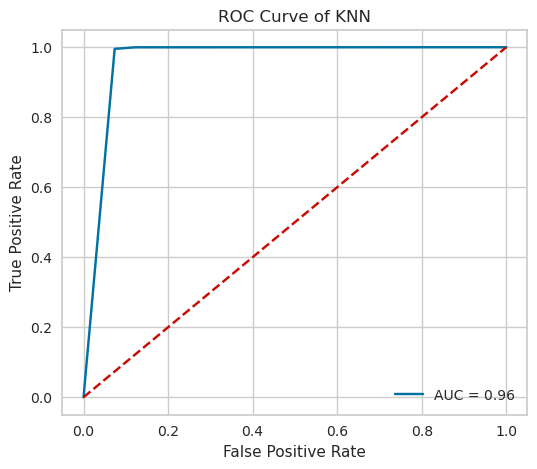

In [ ]:
# Plot ROC curve
y_scores_knn = knn.predict_proba(X_test)
auc_knn = round(roc_curve_plot(y_test, y_scores_knn, 'KNN')*100,2)

### 6. XG Boost

In [ ]:
# Create model
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_Pred = XGB.predict(X_test)

XGB Accuracy Score:  90.0 %

XGB - Confusion Matrix


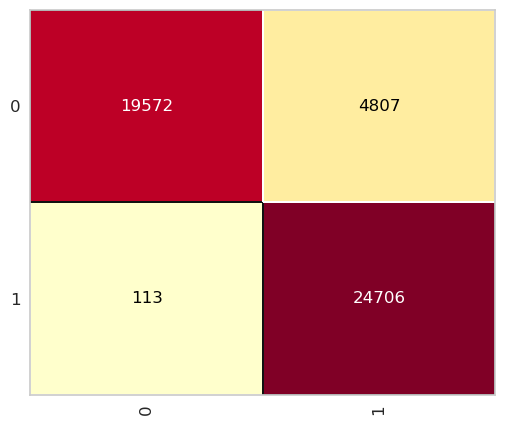

In [ ]:
cm_XGB = ConfusionMatrix(XGB)
cm_XGB.fit(X_train, y_train)
Acc_XGB = round(cm_XGB.score(X_test, y_test)*100, 2)

print("XGB Accuracy Score: ",Acc_XGB,"%\n")
print("XGB - Confusion Matrix")

In [ ]:
# Create metrics table
pr_XGB, rec_XGB, F_XGB,supp = score(y_test, XGB_Pred)
pr_XGB_0, rec_XGB_0, F_XGB_0 = round(pr_XGB[0]*100, 2), round(rec_XGB[0]*100,2), round(F_XGB[0]*100,2)
pr_XGB_1, rec_XGB_1, F_XGB_1 = round(pr_XGB[1]*100, 2), round(rec_XGB[1]*100,2), round(F_XGB[1]*100,2)

In [ ]:
XGB_Report = classification_report(y_test, XGB_Pred)
print(XGB_Report)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     24379
           1       0.84      1.00      0.91     24819

    accuracy                           0.90     49198
   macro avg       0.92      0.90      0.90     49198
weighted avg       0.91      0.90      0.90     49198



<AxesSubplot:title={'center':'Variable Importance for Gradient Boosted Tree'}>

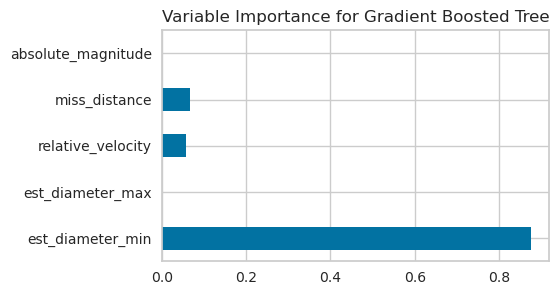

In [ ]:
# Variable importance plot
feat_importances_XGB = pd.Series(XGB.feature_importances_, index=X.columns)
feat_importances_XGB.plot(kind='barh', title = 'Variable Importance for Gradient Boosted Tree', figsize=[5,3])

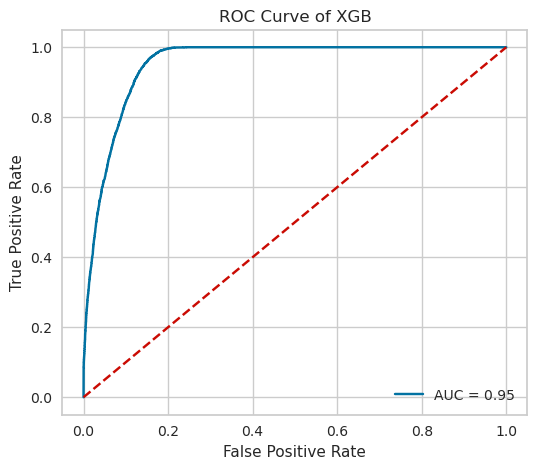

In [ ]:
# Plot ROC curve
y_scores_XGB = XGB.predict_proba(X_test)
auc_XGB = round(roc_curve_plot(y_test, y_scores_XGB, 'XGB')*100,2)

## SVM - Takes longer time to execute. So, i have provided outputs in the results. I made below code as markdown. If you want to run then convert below lines to code.

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

svc_Pred = svc.predict(X_test)

cm_SVC = ConfusionMatrix(svc)
cm_SVC.fit(X_train, y_train)
Acc_SVC = round(cm_SVC.score(X_test, y_test)*100, 2)

print("SVC Accuracy Score: ",Acc_SVC,"%\n")
print("SVC - Confusion Matrix")

# Create metrics table
pr_svc, rec_svc, F_svc,supp = score(y_test, svc_Pred)
pr_svc_0, rec_svc_0, F_svc_0 = round(pr_svc[0]*100, 2), round(rec_svc[0]*100,2), round(F_svc[0]*100,2)
pr_svc_1, rec_svc_1, F_svc_1 = round(pr_svc[1]*100, 2), round(rec_svc[1]*100,2), round(F_svc[1]*100,2)

SVC_Report = classification_report(y_test, svc_Pred)
print(SVC_Report)

## Results

In [ ]:
pr_svc_0,rec_svc_0,F_svc_0=99.28,74.57,85.17

total_table_NonHz = pd.DataFrame({
    'Model': ['Linear Regression','Naive Bayes', 'Decision tree (Entropy)','Decision tree (Gini)',\
              'Random Forest (Entropy)','Random Forest (Gini)','K Nearest Neighbors','XG Boost','SVC' ],
    'AUC': [auc_LR, auc_GNB, auc_DT_ENT, auc_DT_Gini,auc_RF_ENT,auc_RF_Gini,auc_knn,auc_XGB,'NA'],
    'Precision': [pr_LR_0, pr_GNB_0, pr_DT_ENT_0, pr_DT_Gini_0,pr_RF_ENT_0,pr_RF_Gini_0,pr_knn_0,pr_XGB_0,pr_svc_0],
    'Recall': [rec_LR_0, rec_GNB_0, rec_DT_ENT_0, rec_DT_Gini_0,rec_RF_ENT_0,rec_RF_Gini_0,rec_knn_0,rec_XGB_0,rec_svc_0],
    'F1': [F_LR_0, F_GNB_0, F_DT_ENT_0, F_DT_Gini_0,F_RF_ENT_0,F_RF_Gini_0,F_knn_0,F_XGB_0,F_svc_0]})

print("\nClassification Report for Non Hazardous objects\n")

total_table_NonHz.sort_values(by='F1', ascending=False).reset_index(drop=True)


Classification Report for Non Hazardous objects



,Model,AUC,Precision,Recall,F1
0,K Nearest Neighbors,96.28,99.49,92.64,95.94
1,XG Boost,95.3,99.43,80.28,88.83
2,Decision tree (Gini),89.89,98.58,76.44,86.11
3,Random Forest (Entropy),90.83,98.92,76.10,86.02
4,Decision tree (Entropy),89.18,99.10,75.34,85.60
5,Random Forest (Gini),91.07,99.10,75.29,85.57
6,SVC,NA,99.28,74.57,85.17
7,Linear Regression,87.73,91.27,77.24,83.67
8,Naive Bayes,86.78,88.99,76.48,82.27


In [ ]:
pr_svc_1,rec_svc_1,F_svc_1=79.93,99.47,88.64

total_table_Hz = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Decision tree (Entropy)','Decision tree (Gini)',\
              'Random Forest (Entropy)','Random Forest (Gini)','K Nearest Neighbors','XG Boost','SVC' ],
    'AUC': [auc_LR, auc_GNB, auc_DT_ENT, auc_DT_Gini,auc_RF_ENT,auc_RF_Gini,auc_knn,auc_XGB,'NA'],
    'Precision': [pr_LR_1, pr_GNB_1, pr_DT_ENT_1, pr_DT_Gini_1,pr_RF_ENT_1,pr_RF_Gini_1,pr_knn_1,pr_XGB_1,pr_svc_1],
    'Recall': [rec_LR_1, rec_GNB_1, rec_DT_ENT_1, rec_DT_Gini_1,rec_RF_ENT_1,rec_RF_Gini_1,rec_knn_1,rec_XGB_1,rec_svc_1],
    'F1': [F_LR_1, F_GNB_1, F_DT_ENT_1, F_DT_Gini_1,F_RF_ENT_1,F_RF_Gini_1,F_knn_1,F_XGB_1,F_svc_1]})

print("\nClassification Report for Hazardous objects\n")

total_table_Hz.sort_values(by='F1', ascending=False).reset_index(drop=True)


Classification Report for Hazardous objects



,Model,AUC,Precision,Recall,F1
0,K Nearest Neighbors,96.28,93.23,99.53,96.28
1,XG Boost,95.3,83.71,99.54,90.94
2,Decision tree (Gini),89.89,81.04,98.92,89.09
3,Random Forest (Entropy),90.83,80.86,99.19,89.09
4,Decision tree (Entropy),89.18,80.39,99.33,88.87
5,Random Forest (Gini),91.07,80.36,99.33,88.84
6,SVC,NA,79.93,99.47,88.64
7,Logistic Regression,87.73,80.57,92.74,86.23
8,Naive Bayes,86.78,79.70,90.71,84.85


In [ ]:
Acc_SVC=87.13

total_table_Acc = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Decision tree (Entropy)','Decision tree (Gini)',\
              'Random Forest (Entropy)','Random Forest (Gini)','K Nearest Neighbors','XG Boost','SVC' ],
    'Accuracy': [Acc_LR, Acc_GNB, Acc_DT_ENT, Acc_DT_Gini,Acc_RF_ENT,Acc_RF_Gini,Acc_knn,Acc_XGB,Acc_SVC]})

total_table_Acc.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy
0,K Nearest Neighbors,96.12
1,XG Boost,90.00
2,Decision tree (Gini),87.78
3,Random Forest (Entropy),87.75
4,Decision tree (Entropy),87.44
5,Random Forest (Gini),87.42
6,SVC,87.13
7,Logistic Regression,85.06
8,Naive Bayes,83.66


### Results Observations

We can clearly see KNN is outperforming all other models.

AUC is excellent for KNN & XGB algorithms.

Recall of Hazardous objects is excellent for all the models whereas for Non-hazardous objects KNN is excellent.

Precision of Hazardous objects is excellent for KNN, and it is good for other models.

F1 score is excellent for hazardous objects after implementing over sampling technique.

absolute_magnitude & est_diameter_min/max features have played very important role in most of the models.